In [1]:
import pandas
airline = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/cathayts/master/data/airline_passengers.csv',index_col='Month',parse_dates=True)


In [2]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
airline.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


Populating the interactive namespace from numpy and matplotlib


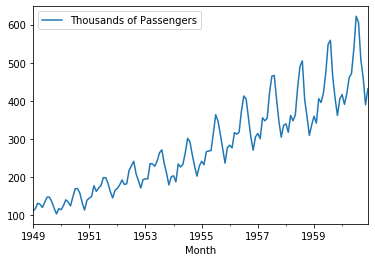

In [4]:
%pylab inline
airline.plot()

In [7]:
import pandas
df  = pandas.read_csv('data_edited_2018.csv')
df['dt'] = df['date'] + ' ' + df['time']
df['dt'] = pandas.to_datetime(df['dt'], format = '%Y/%m/%d %H:%M')
df.set_index('dt', inplace=True)

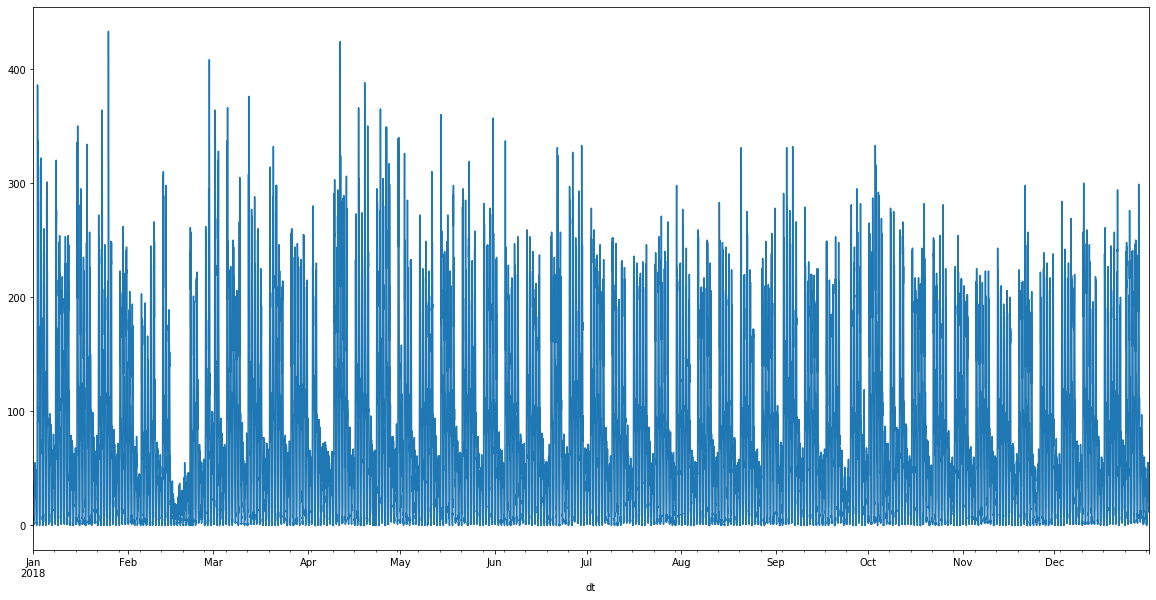

In [9]:
df['y'].plot(kind = 'line', figsize = [20,10])


## 移動平均數

In [10]:
moving_avg_6  = airline['Thousands of Passengers'].rolling(window = 6).mean()
moving_avg_12 = airline['Thousands of Passengers'].rolling(window = 12).mean()

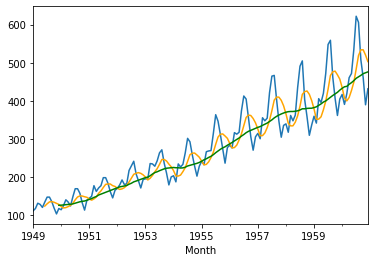

In [11]:
airline['Thousands of Passengers'].plot()
moving_avg_6.plot(color='orange')
moving_avg_12.plot(color='green')

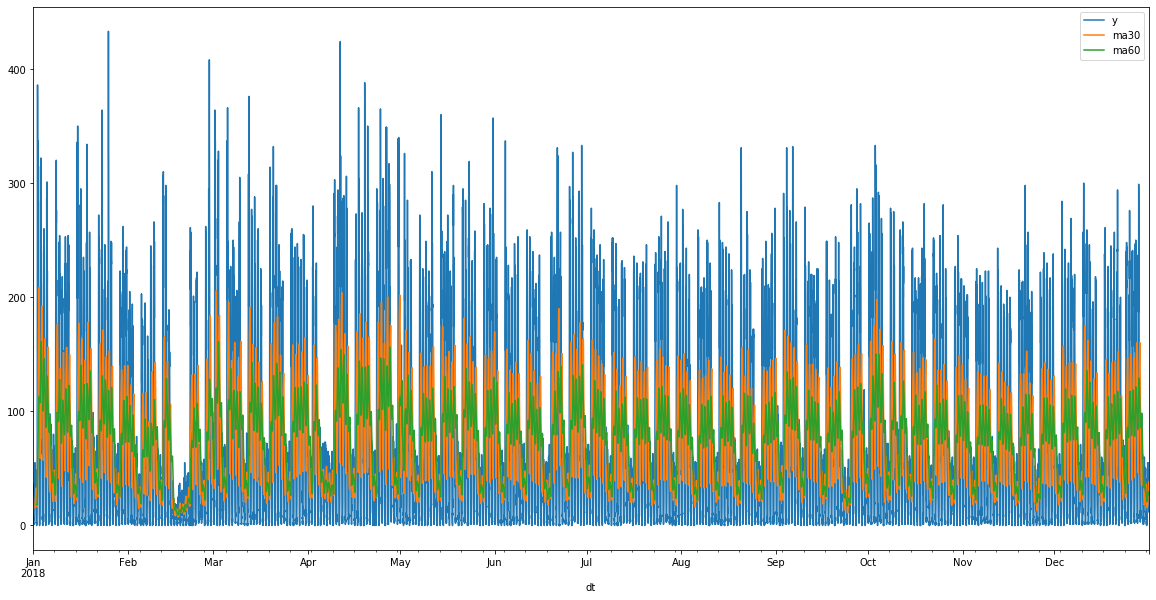

In [12]:
df['ma30'] = df['y'].rolling(window = 30).mean()
df['ma60'] = df['y'].rolling(window = 60).mean()
df[['y', 'ma30', 'ma60']].plot(kind = 'line', figsize = [20,10])


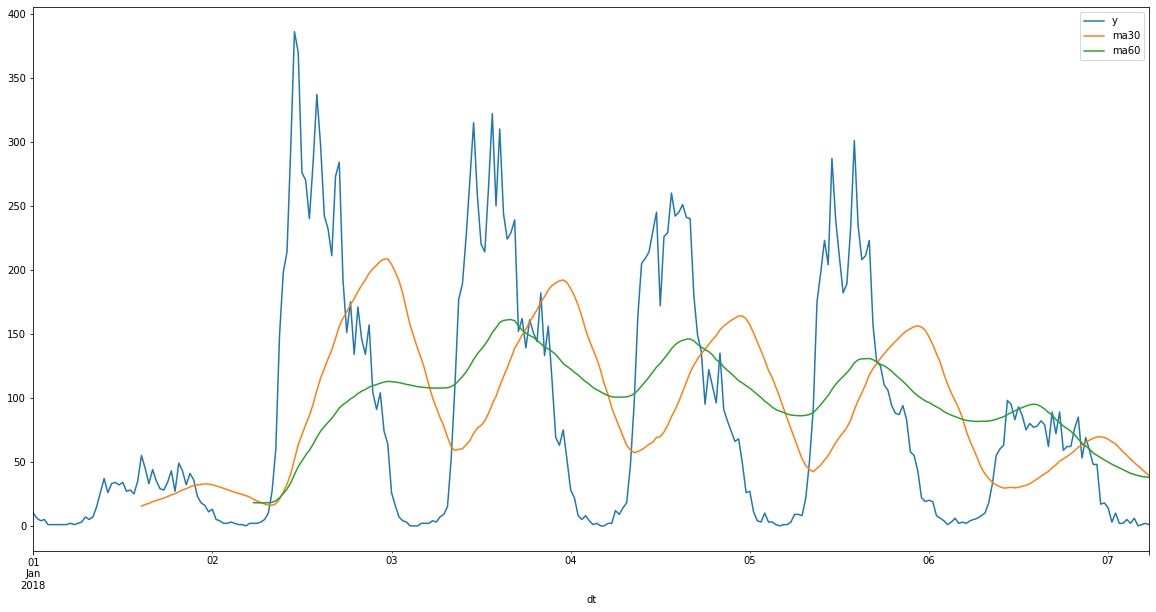

In [13]:
df.head(300)[['y', 'ma30', 'ma60']].plot(kind = 'line', figsize = [20,10])


## ETS Decomposition

In [14]:
import statsmodels
print(dir(statsmodels))

['CacheWriteWarning', 'ConvergenceWarning', 'InvalidTestWarning', 'IterationLimitWarning', 'LooseVersion', 'PytestTester', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'compat', 'datasets', 'debug_warnings', 'os', 'print_function', 'simplefilter', 'sys', 'test', 'tools', 'version']


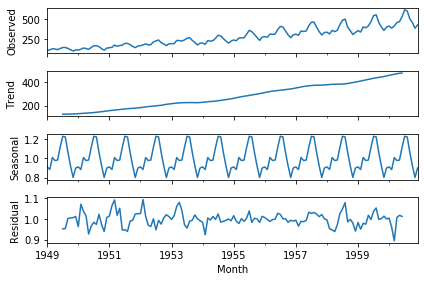

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
#result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')
result = seasonal_decompose(airline['Thousands of Passengers'], model='mul')
result.plot();

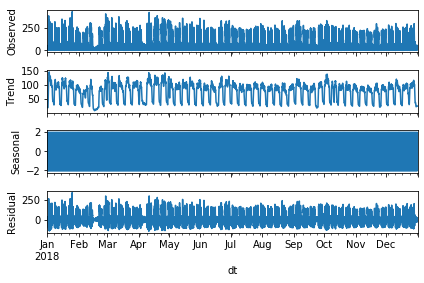

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['y'], model='add', freq=52)
result.plot();


## 簡單移動平均法

In [21]:
import numpy as np
import pandas
a = pandas.Series(np.arange(0,100, 10))

In [24]:
a

0     0
1    10
2    20
3    30
4    40
5    50
6    60
7    70
8    80
9    90
dtype: int64

In [23]:
a.rolling(window = 5).mean()

0     NaN
1     NaN
2     NaN
3     NaN
4    20.0
5    30.0
6    40.0
7    50.0
8    60.0
9    70.0
dtype: float64

In [27]:
?a.ewm

In [30]:
a

0     0
1    10
2    20
3    30
4    40
5    50
6    60
7    70
8    80
9    90
dtype: int64

In [28]:
a.ewm(alpha=0.9).mean()
# 0 * (1-0.9) + 10 * 0.9 = 9
# 9 * (1-0.9) + 20 * 0.9 = 18.9

0     0.000000
1     9.090909
2    18.918919
3    28.892889
4    38.889389
5    48.888949
6    58.888896
7    68.888890
8    78.888889
9    88.888889
dtype: float64

In [31]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12,adjust=False).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [32]:
airline.head(12)

,Thousands of Passengers,EWMA12,12-month-SMA
Month,,,
1949-01-01,112,112.000000,NaN
1949-02-01,118,112.923077,NaN
1949-03-01,132,115.857988,NaN
1949-04-01,129,117.879836,NaN
1949-05-01,121,118.359861,NaN
1949-06-01,135,120.919883,NaN
1949-07-01,148,125.086055,NaN
1949-08-01,148,128.611277,NaN
1949-09-01,136,129.748004,NaN


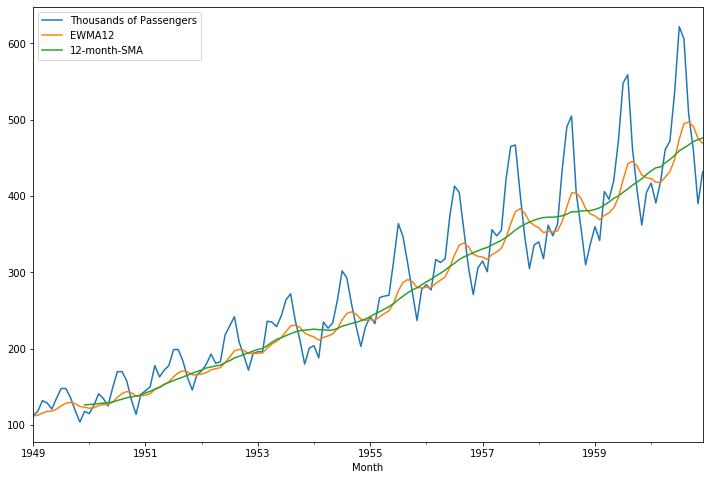

In [33]:
airline[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True)

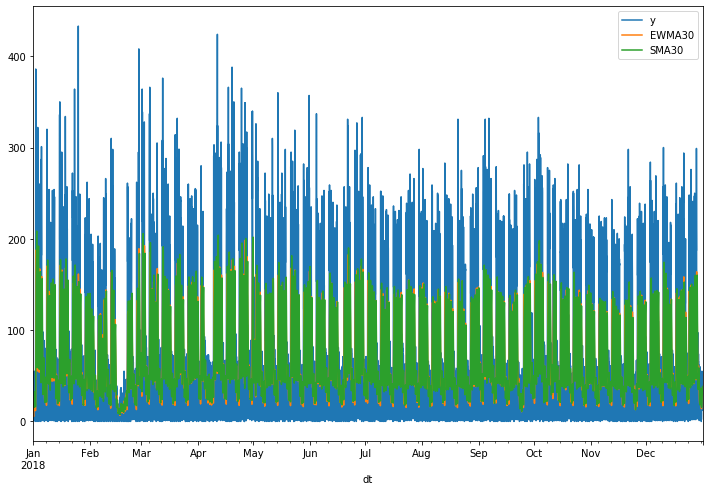

In [34]:
df['EWMA30'] = df['y'].ewm(span=30,adjust=False).mean()
df['SMA30'] = df['y'].rolling(window=30).mean()
df[['y','EWMA30','SMA30']].plot(figsize=(12,8)).autoscale(axis='x',tight=True)


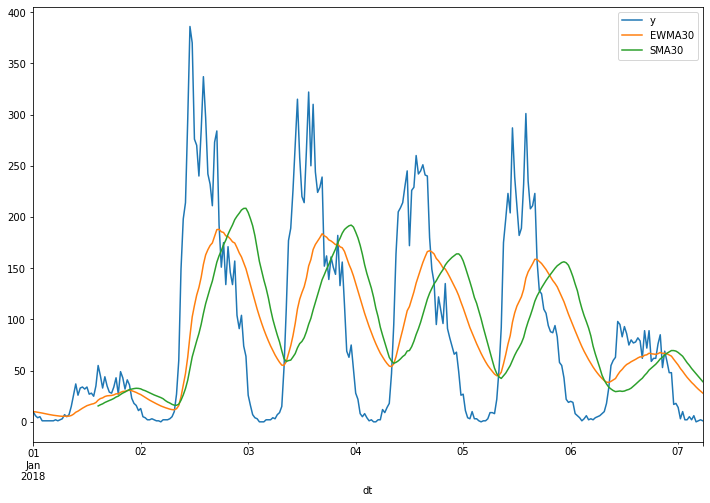

In [35]:
df[['y','EWMA30','SMA30']].head(300).plot(figsize=(12,8)).autoscale(axis='x',tight=True)


## HoltWinters

In [38]:
airline.head()

,Thousands of Passengers,EWMA12,12-month-SMA
Month,,,
1949-01-01,112,112.000000,NaN
1949-02-01,118,112.923077,NaN
1949-03-01,132,115.857988,NaN
1949-04-01,129,117.879836,NaN
1949-05-01,121,118.359861,NaN


In [39]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span  = 12
alpha = 2/(span+1)

airline['EWMA12'] = airline['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()
airline['SES12']=SimpleExpSmoothing(airline['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
airline.head()

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


,Thousands of Passengers,EWMA12,12-month-SMA,SES12
Month,,,,
1949-01-01,112,112.000000,NaN,112.000000
1949-02-01,118,112.923077,NaN,112.923077
1949-03-01,132,115.857988,NaN,115.857988
1949-04-01,129,117.879836,NaN,117.879836
1949-05-01,121,118.359861,NaN,118.359861


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


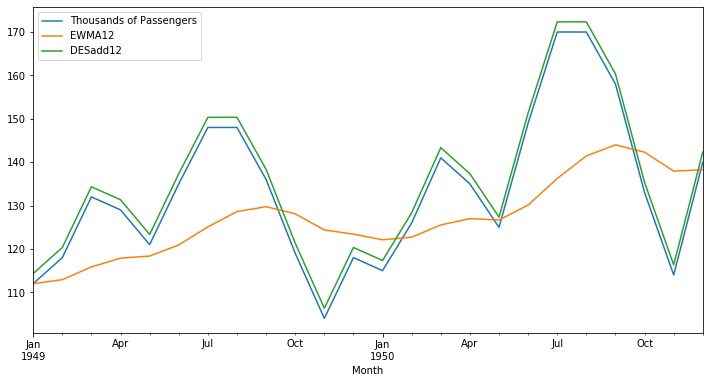

In [42]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing

airline['DESadd12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
airline[['Thousands of Passengers','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

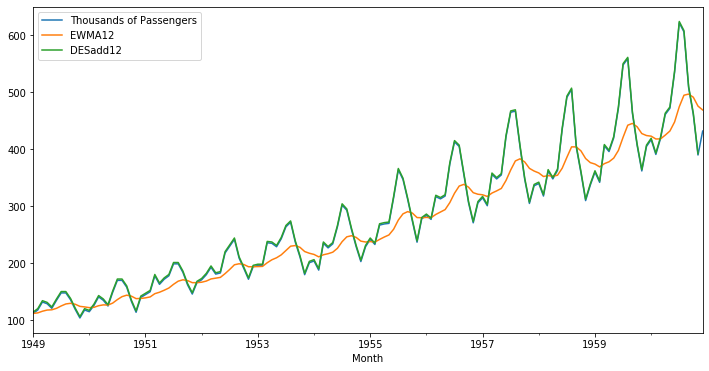

In [43]:
airline[['Thousands of Passengers','EWMA12','DESadd12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  % freq, ValueWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


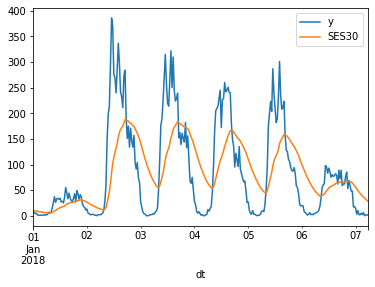

In [44]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 30
alpha = 2/(span+1)
df['EWMA30'] = df['y'].ewm(alpha=alpha,adjust=False).mean()
df['SES30']=SimpleExpSmoothing(df['y']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head(300)[['y','SES30']].plot(kind = 'line')


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  % freq, ValueWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


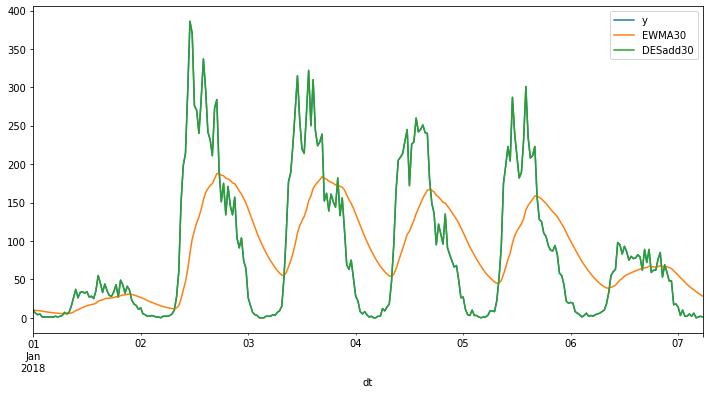

In [45]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
df['DESadd30'] = ExponentialSmoothing(df['y'], trend='add').fit().fittedvalues.shift(-1)
df[['y','EWMA30','DESadd30']].iloc[:300].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  % freq, ValueWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:70: RuntimeWarning: divide by zero encountered in double_scalars
  b[i] = (beta * (l[i] / l[i - 1])) + (betac * b[i - 1]**phi)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:70: RuntimeWarning: invalid value encountered in double_scalars
  b[i] = (beta * (l[i] / l[i - 1])) + (betac * b[i - 1]**phi)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-pack

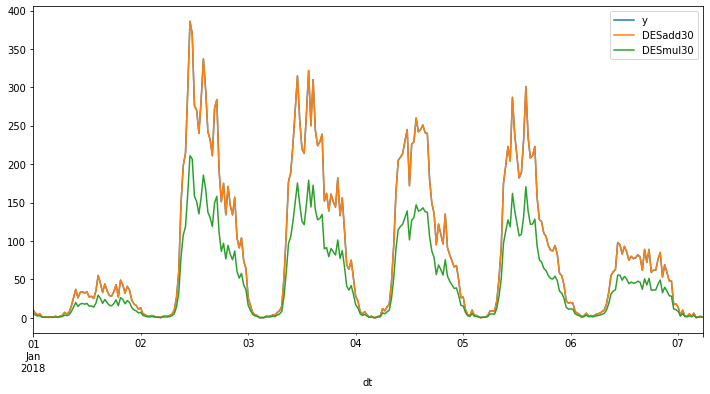

In [49]:
df['y2'] = df['y']
df.loc[df['y2'] == 0, 'y2'] = 1
df['DESmul30'] = ExponentialSmoothing(df['y2'], trend='mul').fit().fittedvalues.shift(-1)
df[['y','DESadd30','DESmul30']].iloc[:300].plot(figsize=(12,6)).autoscale(axis='x',tight=True)


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  % freq, ValueWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


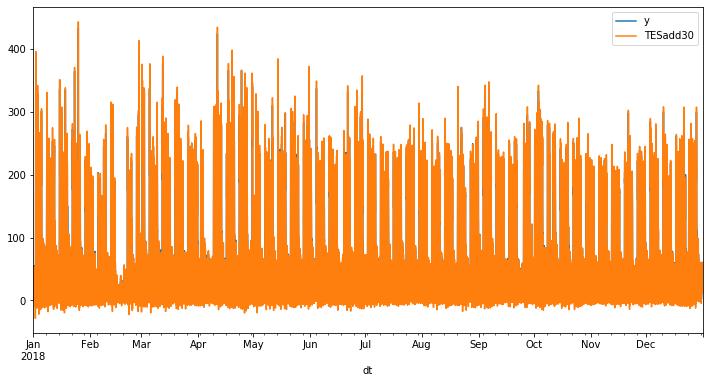

In [50]:
df['TESadd30'] = ExponentialSmoothing(df['y'],trend='add',seasonal='add',seasonal_periods=30).fit().fittedvalues
df[['y','TESadd30']].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

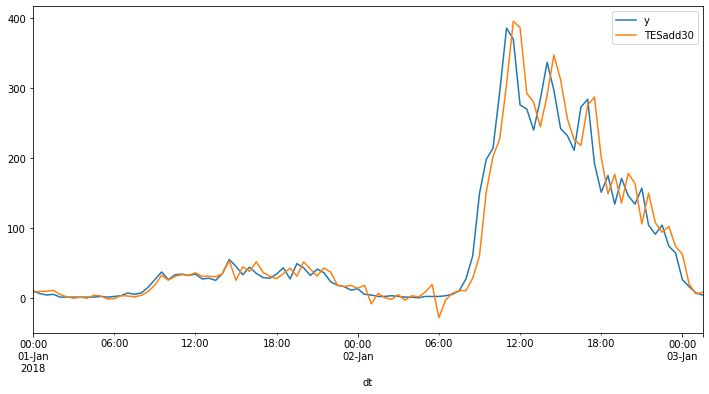

In [51]:
df[['y','TESadd30']].head(100).plot(figsize=(12,6)).autoscale(axis='x',tight=True)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


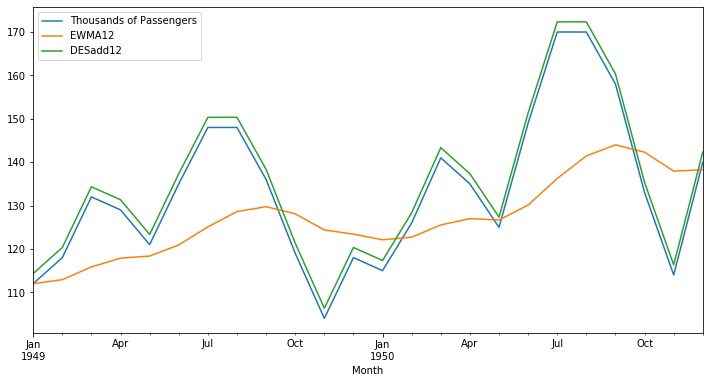

In [54]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

airline['DESadd12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
airline[['Thousands of Passengers','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


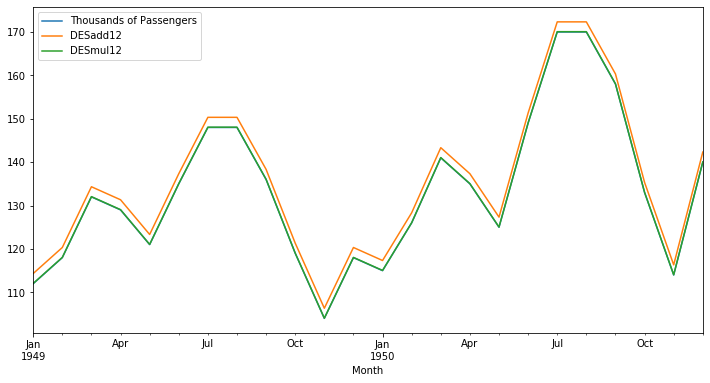

In [55]:
airline['DESmul12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
airline[['Thousands of Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


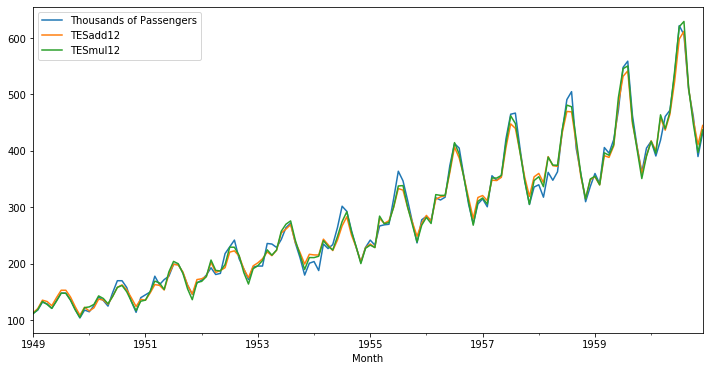

In [56]:

airline['TESadd12'] = ExponentialSmoothing(airline['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
airline['TESmul12'] = ExponentialSmoothing(airline['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
airline[['Thousands of Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

## 使用 HoltWinters 方法建立模型

In [57]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/ywchiu/cathayts/master/data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [58]:
len(df)

144

In [59]:
train_data = df.iloc[:108] 
test_data = df.iloc[108:]

In [60]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [61]:
fitted_model.forecast(12)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


1958-01-01    344.652462
1958-02-01    335.516445
1958-03-01    393.779830
1958-04-01    384.495099
1958-05-01    390.572197
1958-06-01    452.927730
1958-07-01    499.935723
1958-08-01    489.536335
1958-09-01    425.554056
1958-10-01    369.258403
1958-11-01    323.345355
1958-12-01    369.142533
Freq: MS, dtype: float64

In [62]:
test_predictions = fitted_model.forecast(36).rename('HW Forecast')

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


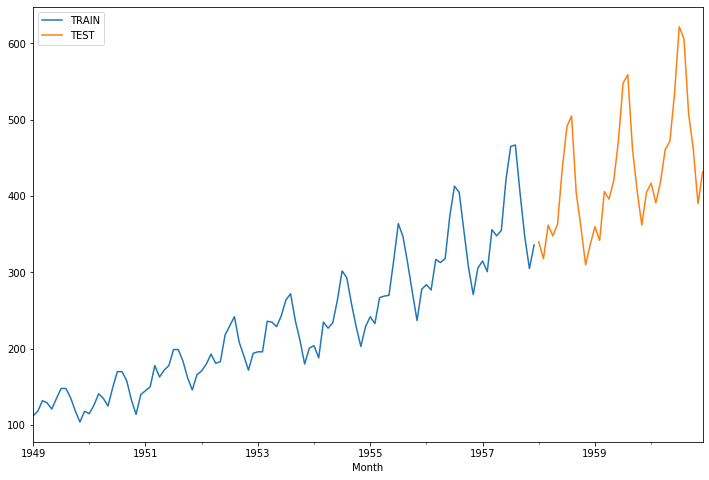

In [63]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

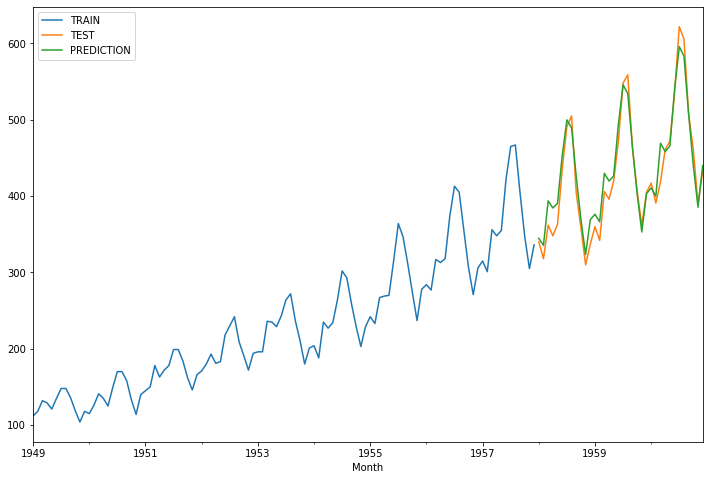

In [64]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

Populating the interactive namespace from numpy and matplotlib


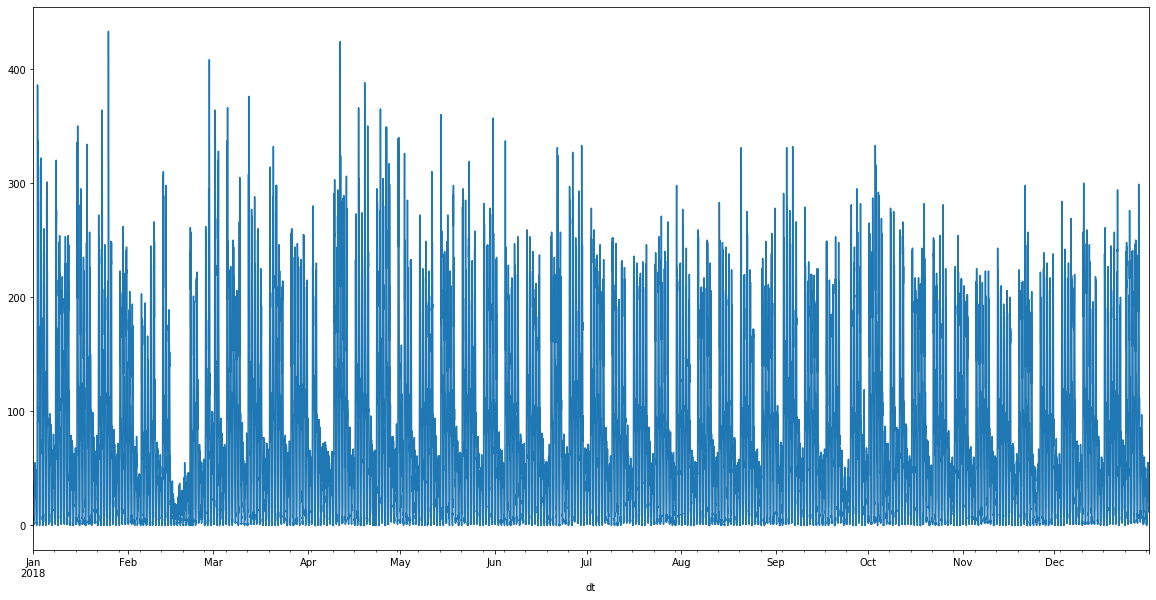

In [65]:
%pylab inline
import pandas
df = pandas.read_csv('data_edited_2018.csv')
df['dt'] = df['date'] + ' ' + df['time']
df['dt'] = pandas.to_datetime(df['dt'], format = '%Y/%m/%d %H:%M')
df.set_index('dt', inplace=True)
df['y'].plot(kind = 'line', figsize = [20,10])


In [76]:
df.index.freq = '30T'

In [77]:
len(df)

17520

In [78]:
len(df) * 0.75

13140.0

In [79]:
train_data = df.iloc[:13140] 
test_data = df.iloc[13140:]


In [85]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model =ExponentialSmoothing(train_data['y'],trend='add', seasonal= 'add', seasonal_periods= 48).fit()

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


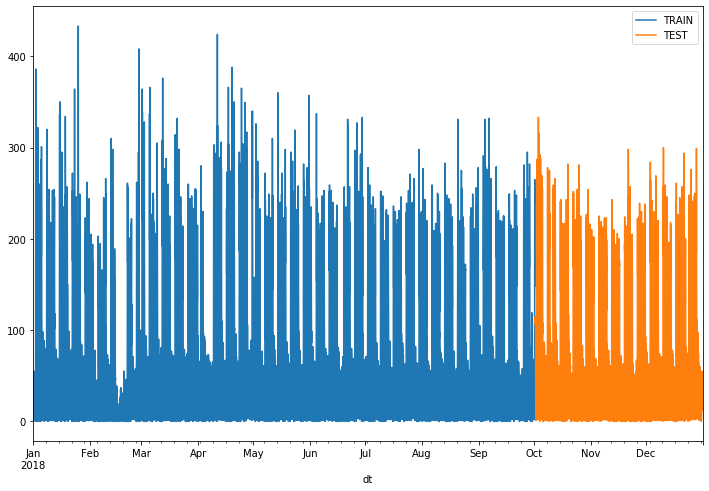

In [86]:
test_predictions = fitted_model.forecast(4380).rename('HW Forecast')
train_data['y'].plot(legend=True,label='TRAIN')
test_data['y'].plot(legend=True,label='TEST',figsize=(12,8));


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


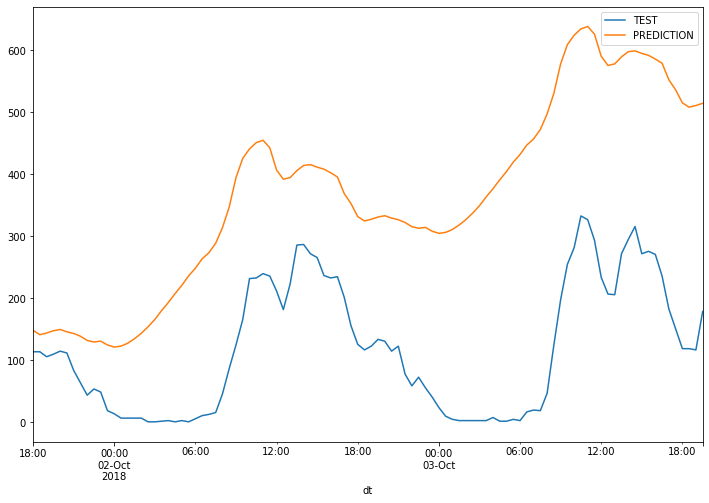

In [87]:
test_predictions = fitted_model.forecast(100).rename('HW Forecast')
test_data['y'].iloc[:100].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


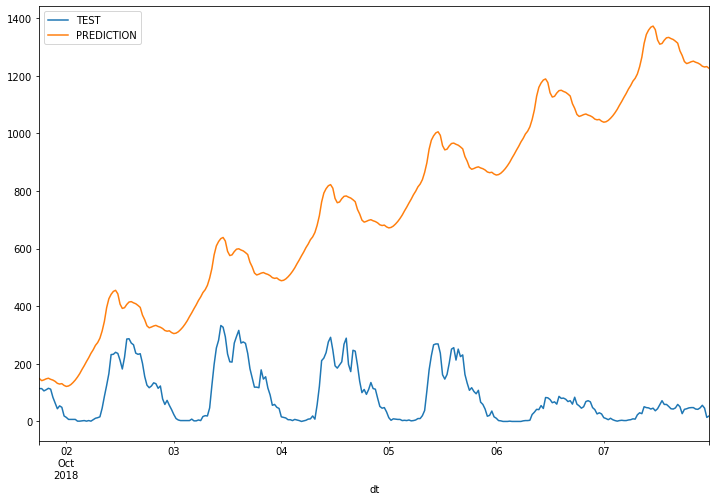

In [88]:
test_predictions = fitted_model.forecast(300).rename('HW Forecast')
test_data['y'].iloc[:300].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');


In [91]:
test_data['y']

dt
2018-10-01 18:00:00    114
2018-10-01 18:30:00    114
2018-10-01 19:00:00    106
2018-10-01 19:30:00    110
2018-10-01 20:00:00    115
2018-10-01 20:30:00    112
2018-10-01 21:00:00     84
2018-10-01 21:30:00     64
2018-10-01 22:00:00     44
2018-10-01 22:30:00     54
2018-10-01 23:00:00     49
2018-10-01 23:30:00     19
2018-10-02 00:00:00     14
2018-10-02 00:30:00      7
2018-10-02 01:00:00      7
2018-10-02 01:30:00      7
2018-10-02 02:00:00      7
2018-10-02 02:30:00      1
2018-10-02 03:00:00      1
2018-10-02 03:30:00      2
2018-10-02 04:00:00      3
2018-10-02 04:30:00      1
2018-10-02 05:00:00      3
2018-10-02 05:30:00      1
2018-10-02 06:00:00      6
2018-10-02 06:30:00     11
2018-10-02 07:00:00     13
2018-10-02 07:30:00     16
2018-10-02 08:00:00     46
2018-10-02 08:30:00     87
                      ... 
2018-12-31 09:00:00     30
2018-12-31 09:30:00     47
2018-12-31 10:00:00     44
2018-12-31 10:30:00     50
2018-12-31 11:00:00     47
2018-12-31 11:30:00     4

In [92]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

test_predictions = fitted_model.forecast(4380).rename('HW Forecast')
mean_squared_error(test_data['y'], test_predictions)


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


95086197.09944353

In [94]:
import numpy as np
np.sqrt(mean_squared_error(test_data['y'], test_predictions))

9751.215160145095

In [95]:
mean_absolute_error(test_data['y'],test_predictions)

8468.590623665255